In [3]:
import query
#import importlib
#importlib.reload(query)

from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = -1
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source" 

filename = 'FCC-43_R_swp.fits'
pixel = 0.55

gaia_results = query.gaia2mask(filename, scale = pixel, CustomQuery = "in_galaxy_candidates = 'False' AND phot_g_mean_mag < 22", 
                               return_GaiaResults = True, write_MaskImage = True)

[+] File created:  FCC-43_R_swp_gaia2mask.fits


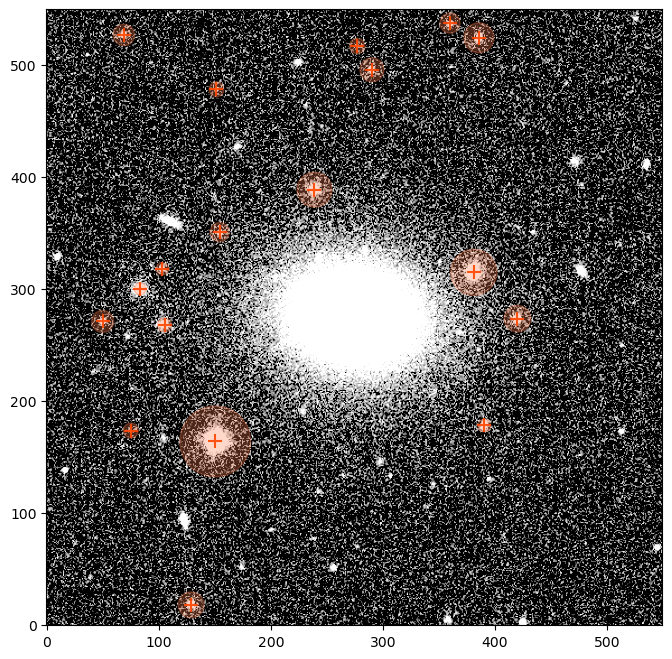

In [2]:
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Ellipse as mpl_ellip
from astropy.visualization import AsymmetricPercentileInterval, ZScaleInterval
from astropy.io import fits
from astropy.wcs import WCS

img_size=(8, 8)
fig = plt.figure(figsize=img_size)
ax1 = fig.add_subplot(111)

image = filename

# ax0 ###
with fits.open(image) as hdul:
    data = hdul[0].data

vmin, vmax = AsymmetricPercentileInterval ( lower_percentile = 50, upper_percentile = 95 ).get_limits ( data )
args = dict( origin = 'lower',  cmap = 'gray', norm = colors.LogNorm(vmin = vmin, vmax = vmax, clip = True) )
ax1.imshow ( data, **args )

# Plot an ellipse for each object
for star in gaia_results:
    smask = mpl_ellip(
        xy=(star['x_pix'], star['y_pix']),
        width=(2.0 * star['rmask_arcsec'] / pixel),
        height=(2.0 * star['rmask_arcsec'] / pixel),
        angle=0.0)
    smask.set_facecolor('coral')
    smask.set_edgecolor('coral')
    smask.set_alpha(0.3)
    ax1.add_artist(smask)

# Show stars
ax1.scatter(
    gaia_results['x_pix'],
    gaia_results['y_pix'],
    c='orangered',
    s=100,
    alpha=0.9,
    marker='+')

#ax1.set_xlim(0, image.shape[0])
#ax1.set_ylim(0, image.shape[1])